In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 

In [2]:
df=pd.read_csv('steamspy_data.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29235 entries, 0 to 29234
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            29235 non-null  int64  
 1   name             29230 non-null  object 
 2   developer        29037 non-null  object 
 3   publisher        28939 non-null  object 
 4   positive         29235 non-null  int64  
 5   negative         29235 non-null  int64  
 6   userscore        29235 non-null  int64  
 7   owners           29235 non-null  int64  
 8   average_forever  29235 non-null  int64  
 9   average_2weeks   29235 non-null  int64  
 10  median_forever   29235 non-null  int64  
 11  median_2weeks    29235 non-null  int64  
 12  price            29206 non-null  float64
 13  initialprice     29213 non-null  float64
 14  discount         29213 non-null  float64
 15  ccu              29235 non-null  int64  
 16  language_1       29141 non-null  object 
 17  language_2  

In [4]:
df.describe()

,appid,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
count,2.923500e+04,2.923500e+04,29235.000000,29235.000000,2.923500e+04,29235.000000,29235.000000,29235.000000,29235.000000,29206.000000,29213.000000,29213.000000,29235.000000
mean,5.937432e+05,9.654789e+02,205.846725,0.148863,1.324113e+05,148.133846,7.162579,145.004652,7.732581,777.811374,803.995755,2.832027,140.956833
std,2.528262e+05,1.829885e+04,4132.388985,3.439954,1.286983e+06,1913.429438,113.653011,2389.469023,124.511022,1135.277801,1169.816585,13.353006,6894.578948
min,1.000000e+01,0.000000e+00,0.000000,0.000000,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.979200e+05,6.000000e+00,2.000000,0.000000,1.000000e+04,0.000000,0.000000,0.000000,0.000000,199.000000,199.000000,0.000000,0.000000
50%,5.982400e+05,2.300000e+01,8.000000,0.000000,1.000000e+04,0.000000,0.000000,0.000000,0.000000,499.000000,499.000000,0.000000,0.000000
75%,7.973700e+05,1.200000e+02,41.000000,0.000000,3.500000e+04,0.000000,0.000000,0.000000,0.000000,999.000000,999.000000,0.000000,0.000000
max,1.069460e+06,2.644404e+06,487076.000000,100.000000,1.500000e+08,190625.000000,9003.000000,190625.000000,9003.000000,59599.000000,59599.000000,90.000000,742725.000000


In [5]:
df.head()

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,...,language_7,language_8,language_9,language_10,language_11,genre_1,genre_2,genre_3,genre_4,genre_5
0,10,Counter-Strike,Valve,Valve,124534,3339,0,15000000,17612,709,...,Traditional Chinese,Korean,NaN,NaN,NaN,Action,NaN,NaN,NaN,NaN
1,20,Team Fortress Classic,Valve,Valve,3318,633,0,7500000,277,15,...,Russian,Simplified Chinese,Traditional Chinese,NaN,NaN,Action,NaN,NaN,NaN,NaN
2,30,Day of Defeat,Valve,Valve,3416,398,0,7500000,187,0,...,NaN,NaN,NaN,NaN,NaN,Action,NaN,NaN,NaN,NaN
3,40,Deathmatch Classic,Valve,Valve,1273,267,0,7500000,258,0,...,Russian,Simplified Chinese,Traditional Chinese,NaN,NaN,Action,NaN,NaN,NaN,NaN
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,5250,288,0,7500000,624,0,...,NaN,NaN,NaN,NaN,NaN,Action,NaN,NaN,NaN,NaN


In [6]:
df.tail()

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,...,language_7,language_8,language_9,language_10,language_11,genre_1,genre_2,genre_3,genre_4,genre_5
29230,1065230,Room of Pandora,SHEN JIAWEI,SHEN JIAWEI,3,0,0,10000,0,0,...,NaN,NaN,NaN,NaN,NaN,Adventure,Casual,Indie,NaN,NaN
29231,1065570,Cyber Gun,Semyon Maximov,BekkerDev Studio,8,1,0,10000,0,0,...,NaN,NaN,NaN,NaN,NaN,Action,Adventure,Indie,NaN,NaN
29232,1065650,Super Star Blast,EntwicklerX,EntwicklerX,0,1,0,10000,0,0,...,NaN,NaN,NaN,NaN,NaN,Action,Casual,Indie,NaN,NaN
29233,1066700,New Yankee 7: Deer Hunters,Yustas Game Studio,Alawar Entertainment,2,0,0,10000,0,0,...,NaN,NaN,NaN,NaN,NaN,Adventure,Casual,Indie,NaN,NaN
29234,1069460,Rune Lord,Adept Studios GD,Alawar Entertainment,4,0,0,10000,0,0,...,Dutch,Russian,NaN,NaN,NaN,Adventure,Casual,Indie,NaN,NaN


In [7]:
df.isnull().sum()

appid                  0
name                   5
developer            198
publisher            296
positive               0
negative               0
userscore              0
owners                 0
average_forever        0
average_2weeks         0
median_forever         0
median_2weeks          0
price                 29
initialprice          22
discount              22
ccu                    0
language_1            94
language_2         16683
language_3         20200
language_4         21616
language_5         22557
language_6         23878
language_7         24805
language_8         25573
language_9         26246
language_10        26864
language_11        27382
genre_1              152
genre_2             4736
genre_3            13363
genre_4            21865
genre_5            26284
dtype: int64

In [8]:
df.isnull().sum()/len(df)

appid              0.000000
name               0.000171
developer          0.006773
publisher          0.010125
positive           0.000000
negative           0.000000
userscore          0.000000
owners             0.000000
average_forever    0.000000
average_2weeks     0.000000
median_forever     0.000000
median_2weeks      0.000000
price              0.000992
initialprice       0.000753
discount           0.000753
ccu                0.000000
language_1         0.003215
language_2         0.570652
language_3         0.690953
language_4         0.739388
language_5         0.771575
language_6         0.816761
language_7         0.848469
language_8         0.874739
language_9         0.897760
language_10        0.918899
language_11        0.936617
genre_1            0.005199
genre_2            0.161998
genre_3            0.457089
genre_4            0.747905
genre_5            0.899059
dtype: float64

In [9]:
df.iloc[:5, :5]

,appid,name,developer,publisher,positive
0,10,Counter-Strike,Valve,Valve,124534
1,20,Team Fortress Classic,Valve,Valve,3318
2,30,Day of Defeat,Valve,Valve,3416
3,40,Deathmatch Classic,Valve,Valve,1273
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,5250


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29235 entries, 0 to 29234
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            29235 non-null  int64  
 1   name             29230 non-null  object 
 2   developer        29037 non-null  object 
 3   publisher        28939 non-null  object 
 4   positive         29235 non-null  int64  
 5   negative         29235 non-null  int64  
 6   userscore        29235 non-null  int64  
 7   owners           29235 non-null  int64  
 8   average_forever  29235 non-null  int64  
 9   average_2weeks   29235 non-null  int64  
 10  median_forever   29235 non-null  int64  
 11  median_2weeks    29235 non-null  int64  
 12  price            29206 non-null  float64
 13  initialprice     29213 non-null  float64
 14  discount         29213 non-null  float64
 15  ccu              29235 non-null  int64  
 16  language_1       29141 non-null  object 
 17  language_2  

In [11]:
df.iloc[ df.columns.get_loc('positive')]
print(df)

         appid                        name           developer  \
0           10              Counter-Strike               Valve   
1           20       Team Fortress Classic               Valve   
2           30               Day of Defeat               Valve   
3           40          Deathmatch Classic               Valve   
4           50   Half-Life: Opposing Force    Gearbox Software   
...        ...                         ...                 ...   
29230  1065230             Room of Pandora         SHEN JIAWEI   
29231  1065570                   Cyber Gun      Semyon Maximov   
29232  1065650            Super Star Blast         EntwicklerX   
29233  1066700  New Yankee 7: Deer Hunters  Yustas Game Studio   
29234  1069460                   Rune Lord    Adept Studios GD   

                  publisher  positive  negative  userscore    owners  \
0                     Valve    124534      3339          0  15000000   
1                     Valve      3318       633          0   75

In [12]:
df.loc[2,'price']

499.0

In [13]:
df[df['positive'] > 100]

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,...,language_7,language_8,language_9,language_10,language_11,genre_1,genre_2,genre_3,genre_4,genre_5
0,10,Counter-Strike,Valve,Valve,124534,3339,0,15000000,17612,709,...,Traditional Chinese,Korean,NaN,NaN,NaN,Action,NaN,NaN,NaN,NaN
1,20,Team Fortress Classic,Valve,Valve,3318,633,0,7500000,277,15,...,Russian,Simplified Chinese,Traditional Chinese,NaN,NaN,Action,NaN,NaN,NaN,NaN
2,30,Day of Defeat,Valve,Valve,3416,398,0,7500000,187,0,...,NaN,NaN,NaN,NaN,NaN,Action,NaN,NaN,NaN,NaN
3,40,Deathmatch Classic,Valve,Valve,1273,267,0,7500000,258,0,...,Russian,Simplified Chinese,Traditional Chinese,NaN,NaN,Action,NaN,NaN,NaN,NaN
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,5250,288,0,7500000,624,0,...,NaN,NaN,NaN,NaN,NaN,Action,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29058,1046030,ISLANDERS,GrizzlyGames,GrizzlyGames,1490,77,0,150000,0,0,...,Russian,NaN,NaN,NaN,NaN,Casual,Indie,Strategy,NaN,NaN
29111,1049800,BLOCKADE Classic,Novalink,Novalink,256,141,0,150000,0,0,...,NaN,NaN,NaN,NaN,NaN,Action,Free to Play,Indie,Massively Multiplayer,Early Access
29133,1051310,Paper Dolls: Original / 纸人：第一章,"Beijing Litchi Culture Media Co., Ltd.",Gamera Game,221,103,0,10000,347,347,...,Korean,NaN,NaN,NaN,NaN,Action,Adventure,Indie,NaN,NaN
29141,1052070,Burning Daylight,Burning Daylight Team,Burning Daylight Team,689,78,0,75000,0,0,...,NaN,NaN,NaN,NaN,NaN,Adventure,Free to Play,Indie,NaN,NaN


In [14]:
df[df['negative'] > 100]

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,...,language_7,language_8,language_9,language_10,language_11,genre_1,genre_2,genre_3,genre_4,genre_5
0,10,Counter-Strike,Valve,Valve,124534,3339,0,15000000,17612,709,...,Traditional Chinese,Korean,NaN,NaN,NaN,Action,NaN,NaN,NaN,NaN
1,20,Team Fortress Classic,Valve,Valve,3318,633,0,7500000,277,15,...,Russian,Simplified Chinese,Traditional Chinese,NaN,NaN,Action,NaN,NaN,NaN,NaN
2,30,Day of Defeat,Valve,Valve,3416,398,0,7500000,187,0,...,NaN,NaN,NaN,NaN,NaN,Action,NaN,NaN,NaN,NaN
3,40,Deathmatch Classic,Valve,Valve,1273,267,0,7500000,258,0,...,Russian,Simplified Chinese,Traditional Chinese,NaN,NaN,Action,NaN,NaN,NaN,NaN
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,5250,288,0,7500000,624,0,...,NaN,NaN,NaN,NaN,NaN,Action,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28641,1021950,When the Darkness comes,Sirhaian,Sirhaian,2966,301,0,150000,0,0,...,NaN,NaN,NaN,NaN,NaN,Adventure,Free to Play,Indie,NaN,NaN
28715,1025580,Vainglory,Super Evil Megacorp,Super Evil Megacorp,1211,739,0,350000,0,0,...,Korean,Portuguese - Brazil,Russian,Simplified Chinese,Spanish - Latin America,Free to Play,Strategy,Early Access,NaN,NaN
29033,1044200,Wasteland Survival,"Joyloft Co., Limited","Joyloft Co., Limited",277,265,0,75000,0,0,...,NaN,NaN,NaN,NaN,NaN,Action,Adventure,Free to Play,RPG,Simulation
29111,1049800,BLOCKADE Classic,Novalink,Novalink,256,141,0,150000,0,0,...,NaN,NaN,NaN,NaN,NaN,Action,Free to Play,Indie,Massively Multiplayer,Early Access


In [15]:
df['price'].fillna(df['price'].median(), inplace=True)

C:\Users\Komal RS\AppData\Local\Temp\ipykernel_23308\1576110267.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].median(), inplace=True)


In [16]:
print(df)

         appid                        name           developer  \
0           10              Counter-Strike               Valve   
1           20       Team Fortress Classic               Valve   
2           30               Day of Defeat               Valve   
3           40          Deathmatch Classic               Valve   
4           50   Half-Life: Opposing Force    Gearbox Software   
...        ...                         ...                 ...   
29230  1065230             Room of Pandora         SHEN JIAWEI   
29231  1065570                   Cyber Gun      Semyon Maximov   
29232  1065650            Super Star Blast         EntwicklerX   
29233  1066700  New Yankee 7: Deer Hunters  Yustas Game Studio   
29234  1069460                   Rune Lord    Adept Studios GD   

                  publisher  positive  negative  userscore    owners  \
0                     Valve    124534      3339          0  15000000   
1                     Valve      3318       633          0   75

In [17]:
df['initialprice'].fillna(df['initialprice'].median(), inplace=True)


C:\Users\Komal RS\AppData\Local\Temp\ipykernel_23308\1602808190.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['initialprice'].fillna(df['initialprice'].median(), inplace=True)


In [18]:
print(df)

         appid                        name           developer  \
0           10              Counter-Strike               Valve   
1           20       Team Fortress Classic               Valve   
2           30               Day of Defeat               Valve   
3           40          Deathmatch Classic               Valve   
4           50   Half-Life: Opposing Force    Gearbox Software   
...        ...                         ...                 ...   
29230  1065230             Room of Pandora         SHEN JIAWEI   
29231  1065570                   Cyber Gun      Semyon Maximov   
29232  1065650            Super Star Blast         EntwicklerX   
29233  1066700  New Yankee 7: Deer Hunters  Yustas Game Studio   
29234  1069460                   Rune Lord    Adept Studios GD   

                  publisher  positive  negative  userscore    owners  \
0                     Valve    124534      3339          0  15000000   
1                     Valve      3318       633          0   75

In [19]:

df['discount'].fillna(df['discount'].median(), inplace=True)


C:\Users\Komal RS\AppData\Local\Temp\ipykernel_23308\3178376064.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['discount'].fillna(df['discount'].median(), inplace=True)


In [20]:
print(df)

         appid                        name           developer  \
0           10              Counter-Strike               Valve   
1           20       Team Fortress Classic               Valve   
2           30               Day of Defeat               Valve   
3           40          Deathmatch Classic               Valve   
4           50   Half-Life: Opposing Force    Gearbox Software   
...        ...                         ...                 ...   
29230  1065230             Room of Pandora         SHEN JIAWEI   
29231  1065570                   Cyber Gun      Semyon Maximov   
29232  1065650            Super Star Blast         EntwicklerX   
29233  1066700  New Yankee 7: Deer Hunters  Yustas Game Studio   
29234  1069460                   Rune Lord    Adept Studios GD   

                  publisher  positive  negative  userscore    owners  \
0                     Valve    124534      3339          0  15000000   
1                     Valve      3318       633          0   75

In [21]:
lcol = [col for col in df.columns if 'language' in col]
gcol = [col for col in df.columns if 'genre' in col]

df[lcol] = df[lcol].fillna('Unknown')
df[gcol] = df[gcol].fillna('Unknown')


In [22]:

le = LabelEncoder()
df['developer_LabelEncoded'] = le.fit_transform(df['developer'])
df['publisher_LabelEncoded'] = le.fit_transform(df['publisher'])

In [23]:
df.head()

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,...,language_9,language_10,language_11,genre_1,genre_2,genre_3,genre_4,genre_5,developer_LabelEncoded,publisher_LabelEncoded
0,10,Counter-Strike,Valve,Valve,124534,3339,0,15000000,17612,709,...,Unknown,Unknown,Unknown,Action,Unknown,Unknown,Unknown,Unknown,16071,13361
1,20,Team Fortress Classic,Valve,Valve,3318,633,0,7500000,277,15,...,Traditional Chinese,Unknown,Unknown,Action,Unknown,Unknown,Unknown,Unknown,16071,13361
2,30,Day of Defeat,Valve,Valve,3416,398,0,7500000,187,0,...,Unknown,Unknown,Unknown,Action,Unknown,Unknown,Unknown,Unknown,16071,13361
3,40,Deathmatch Classic,Valve,Valve,1273,267,0,7500000,258,0,...,Traditional Chinese,Unknown,Unknown,Action,Unknown,Unknown,Unknown,Unknown,16071,13361
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,5250,288,0,7500000,624,0,...,Unknown,Unknown,Unknown,Action,Unknown,Unknown,Unknown,Unknown,6023,13361


In [24]:
ubins = [-1, 0, 50, 100]  
ulabels = ['Low', 'Medium', 'High']
df['userscore_binned'] = pd.cut(df['userscore'], bins=ubins, labels=ulabels)

In [25]:
df.head()

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,...,language_10,language_11,genre_1,genre_2,genre_3,genre_4,genre_5,developer_LabelEncoded,publisher_LabelEncoded,userscore_binned
0,10,Counter-Strike,Valve,Valve,124534,3339,0,15000000,17612,709,...,Unknown,Unknown,Action,Unknown,Unknown,Unknown,Unknown,16071,13361,Low
1,20,Team Fortress Classic,Valve,Valve,3318,633,0,7500000,277,15,...,Unknown,Unknown,Action,Unknown,Unknown,Unknown,Unknown,16071,13361,Low
2,30,Day of Defeat,Valve,Valve,3416,398,0,7500000,187,0,...,Unknown,Unknown,Action,Unknown,Unknown,Unknown,Unknown,16071,13361,Low
3,40,Deathmatch Classic,Valve,Valve,1273,267,0,7500000,258,0,...,Unknown,Unknown,Action,Unknown,Unknown,Unknown,Unknown,16071,13361,Low
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,5250,288,0,7500000,624,0,...,Unknown,Unknown,Action,Unknown,Unknown,Unknown,Unknown,6023,13361,Low


In [26]:
afbins = [0, 1000, 10000, 50000]  
aflabels = ['Short', 'Medium', 'Long']
df['avgforeverbinned'] = pd.cut(df['average_forever'], bins=afbins, labels=aflabels)


In [27]:
df.head()

,appid,name,developer,publisher,positive,negative,userscore,owners,average_forever,average_2weeks,...,language_11,genre_1,genre_2,genre_3,genre_4,genre_5,developer_LabelEncoded,publisher_LabelEncoded,userscore_binned,avgforeverbinned
0,10,Counter-Strike,Valve,Valve,124534,3339,0,15000000,17612,709,...,Unknown,Action,Unknown,Unknown,Unknown,Unknown,16071,13361,Low,Long
1,20,Team Fortress Classic,Valve,Valve,3318,633,0,7500000,277,15,...,Unknown,Action,Unknown,Unknown,Unknown,Unknown,16071,13361,Low,Short
2,30,Day of Defeat,Valve,Valve,3416,398,0,7500000,187,0,...,Unknown,Action,Unknown,Unknown,Unknown,Unknown,16071,13361,Low,Short
3,40,Deathmatch Classic,Valve,Valve,1273,267,0,7500000,258,0,...,Unknown,Action,Unknown,Unknown,Unknown,Unknown,16071,13361,Low,Short
4,50,Half-Life: Opposing Force,Gearbox Software,Valve,5250,288,0,7500000,624,0,...,Unknown,Action,Unknown,Unknown,Unknown,Unknown,6023,13361,Low,Short


In [28]:
df['avgforeverbinned'] = df['avgforeverbinned'].fillna(df['avgforeverbinned'].mode()[0])


<Axes: title={'center': 'Positive Review vs Negative Review'}, xlabel='positive', ylabel='negative'>

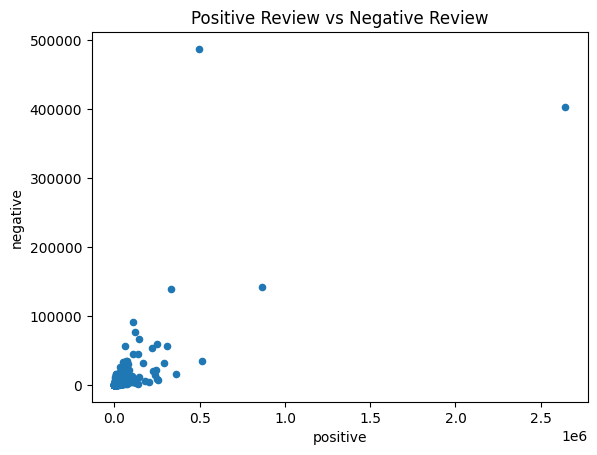

In [29]:
df.plot(kind='scatter', x='positive', y='negative', title='Positive Review vs Negative Review')

<Axes: title={'center': 'Price vs Discount'}, xlabel='discount', ylabel='price'>

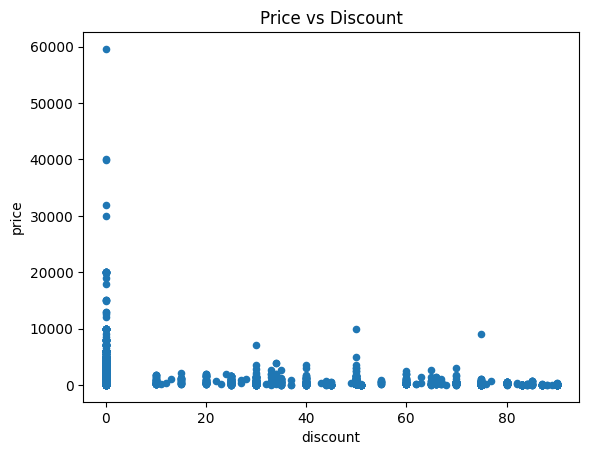

In [30]:
df.plot(kind='scatter', x='discount', y='price', title='Price vs Discount')

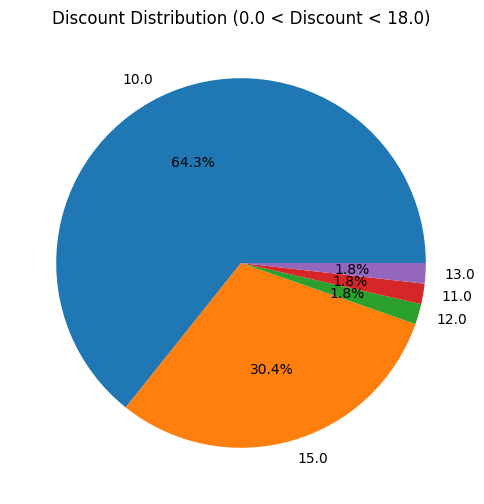

In [31]:
scount = df[(df["discount"] > 0.0) & (df["discount"] < 18.0)]["discount"].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(scount.values, labels=scount.index, autopct="%1.1f%%")
plt.title("Discount Distribution (0.0 < Discount < 18.0)")
plt.show()

<Axes: >

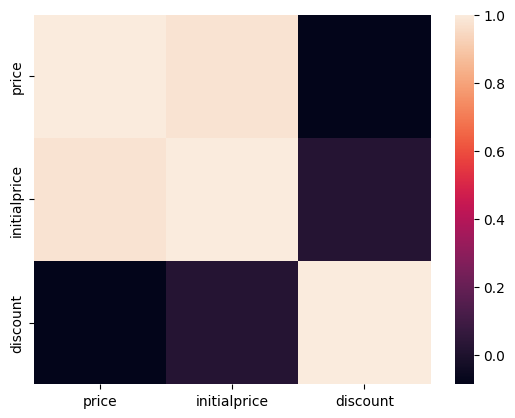

In [32]:

sns.heatmap(data=df.select_dtypes(include=["float64"]).corr())

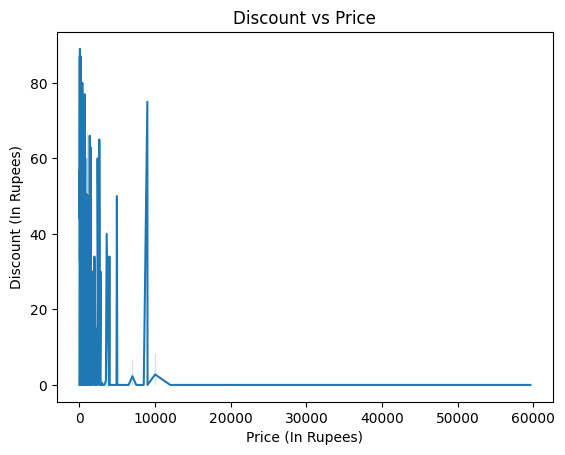

In [33]:
sns.lineplot(x="price", y="discount", data=df)
plt.title("Discount vs Price")
plt.xlabel("Price (In Rupees)")
plt.ylabel("Discount (In Rupees)")
plt.show()

In [36]:
df.to_csv('Team_3(4).csv', index=False)